# Why is Logistic Regression Called Linear Method?

Statistical learning의 가장 기본 도구인 linear regression부터 이야기를 시작해보자.

### 시작하기 전에 유의 사항

* 명확한 의미 전달을 위해서, 여기서의 모든 이야기는 1D를 가정하고 진행한다.
* 비록 기본적인 코드는 작성되어 있지만, 그 알고리즘에 대한 소개는 하지 않는다. 많은 책에서, 위키나 동영상 등 인터넷에서 잘 소개해 줄 것이다.
* 이 notebook은 "The Elements of Statictical Learning" (ESL) 2판 (Hastie 외 저)의 내용을 주로 참고하여 작성되었다.
* 굳이 어색하게 한글로 모두 옮기지 않고, 전문적인 용어는 최대한 그대로 가져간다.

In [1]:
%matplotlib inline
import scipy
import matplotlib.pyplot as plt

### Linear Regression

칠판에 점이 다다닥 찍혀있다. 당신은 대빵 큰 자를 들고 점들을 바라보다가, 마침내 자를 대고 적당하다고 생각되는 선을 쭉 긋는다. "방금 나의 전자 두뇌는 linear regression model을 계산해서 그은 선이야"라고 말해도 된다. 당신이 조금 뻔뻔할 수 있다면 말이다.

수식으로 linear regression 문제를 표현하자면, 아래 식에서 $(\beta_0, \beta_1)$의 값을 추측하는 것이다.

\begin{equation}
Y = f(X) = \beta_0 + \beta_1X
\end{equation}

결과적으로 계산하여 나온 추측값에는 $\hat{\text{hat}}$을 씌운다.

$(\hat\beta_0, \hat\beta_1)$을 통해 나오는 fit은 아까 당신이 자 대고 그은 선과 크게 다르지 않을 것이다.

In [2]:
"""Typical example for 1D linear regression"""
# Generate data
sample_gaussian = scipy.random.multivariate_normal(
    mean=(0, 1),
    cov=((1, .5), (.5, 1)),
    size=100,
)
sample_x = sample_gaussian[:, 0]
sample_y = sample_gaussian[:, 1]

# Plot the data
fig0 = plt.figure(0)
ax00 = fig0.add_subplot(1, 1, 1)
ax00.plot(sample_x, sample_y, 'o')

# Center the data
mean_y = sample_y.mean()
sample_y_centered = sample_y - mean_y

# Linear Regression for 1D
hat_beta = sample_y_centered.dot(sample_x) / (sample_x*sample_x).sum()
hat_y = mean_y + hat_beta*sample_x

# Plot the fit
ax00.set_title('Linear Regression')
ax00.plot(sample_x, hat_y)
plt.show()

### Linear Regression for Classification

"Classification" 상황에서 response 변수는 이산적인 성격을 가지게 된다. 0이냐 1이냐, 남자냐 여자냐 등등, 그래야 분류가 가능할 것이다. 

\begin{equation}
Y = f(X) = \beta_0 + \beta_1X \\
\text{where } Y \in \{0,1\}
\end{equation}

Response가 이산적이든 연속적이든, linear regression은 원래 그런 거 신경쓰는 친구가 아니다.

In [3]:
"""1D linear regression for 0-1 responses"""
sample_x = scipy.concatenate((scipy.linspace(-2, -.5, 50),
                              scipy.linspace(.5, 2, 50)))
sample_y = scipy.concatenate((scipy.zeros(50), scipy.ones(50)))

fig1 = plt.figure(1, figsize=(10, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax11.plot(sample_x, sample_y, 'o', markersize=1)

# Center the data
mean_y = sample_y.mean()
sample_y_centered = sample_y - mean_y

# Linear Regression for 1D
hat_beta = sample_y_centered.dot(sample_x) / (sample_x*sample_x).sum()
hat_y = mean_y + hat_beta*sample_x

# Plot the fit
ax11.set_title('Linear Regression')
ax11.plot(sample_x[[0, -1]], hat_y[[0, -1]])
plt.show()

### 남자냐, 여자냐, ... 아줌마냐?

Y의 경우의 수가 많아지면 0과 1만으로는 문제를 표현할 수가 없다. 굉장히 순수한 마음으로 $Y\in\{0,1,2\}$면 되지 않을까 생각할 수도 있겠으나, $Y=1$일 경우의 스트라이크 존이 다른 경우보다 훨씬 작다는 점을 생각해보자. 이를 해결하기 위한 가장 보편적인 방법으로는 indicator (or dummy) 변수를 사용하는 것이다.

\begin{align}
Y = 0 &\Rightarrow (Y_1, Y_2, Y_3) = (1,0,0) \\
Y = 1 &\Rightarrow (Y_1, Y_2, Y_3) = (0,1,0) \\
Y = 2 &\Rightarrow (Y_1, Y_2, Y_3) = (0,0,1)
\end{align}

각 data point마다 3가지 response에 대해서 linear regression의 결과로 3개의 fitted value를 갖게 될 것이다. 그 중에 가장 큰 값을 분류 문제의 답으로 추측하게 된다.

### 저 직선이 좋아 보이는가?

위와 같이 indicator variable을 이용하는 경우에, fitted value는 마치 "그 그룹으로 분류할 가능성"으로 느낌이 팍팍 다가오는데, 이론적으로도 맞는 말이다.

> With an indicator variable $Y_k$,
>
> \begin{equation}
\text{regression function} = \text{conditional expectation} = \text{posterior probability}
\end{equation}
>
> \begin{equation}
f(x) = \text{E}(Y_k|X=x) = \text{Pr}(G=k|X=x)
\end{equation}

그런데 막상 linear regression fit을 살펴보면 그닥 확률의 기본적인 성질조차 지켜지지 않는 것 같다. 그래서 등장하는 방법이 linear discriminant analysis (LDA)와 logistic regression이다. LDA는 여기서 전혀 다루지 않겠다.

그러니까 logistic regression은 확률의 성질을 만족시키도록 regression function을 보완하는 방법론이라고 볼 수 있다.

### Logit transform

밑도 끝도 없이 일단 logit 변환을 써 놓겠다.

\begin{equation}
\text{logit}: (0,1) \mapsto \mathbb{R} \\
\text{logit}(p) = \log\frac{p}{1-p}
\end{equation}

Logit 변환은 monotone, continuous 하므로, 그 역함수(logistic function)도 마찬가지이다.

\begin{equation}
\text{logistic}: \mathbb{R} \mapsto (0,1) \\
\text{logistic}(a) = \frac1{1+\exp(-a)} = \frac{\exp(a)}{\exp(a)+1}
\end{equation}

Logistic regression이 이 notebook의 주제임을 생각해보면, 이 변환이 등장한 이유를 어느 정도 추측이 가능할 것이다. 실수를 확률처럼 만들어주는 데 적절한 변환이다.

In [4]:
def logit(p:scipy.ndarray)->scipy.ndarray:
    return scipy.log(p/(1-p))


def logistic(a:scipy.ndarray)->scipy.ndarray:
    return scipy.reciprocal(1+scipy.exp(-a))

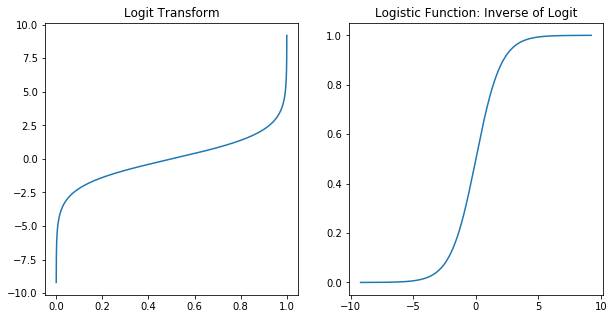

In [9]:
xgrid1 = scipy.linspace(0, 1, 10000, endpoint=False)[1:]
y_logitx = logit(xgrid1)

xgrid2 = y_logitx
y_logisticx = logistic(xgrid2)

fig2 = plt.figure(2, figsize=(10, 5))
ax21 = fig2.add_subplot(1, 2, 1)
ax21.plot(xgrid1, y_logitx)
ax21.set_title('Logit Transform')

ax22 = fig2.add_subplot(1, 2, 2)
ax22.plot(xgrid2, y_logisticx)
ax22.set_title('Logistic Function: Inverse of Logit')
plt.show()

### Logistic Regression

Indicator 변수를 이용한 linear regression 문제를 표현하자면 다음과 같이 쓸 수 있다.

\begin{align}
\text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{Pr}(G=K|X=x) &= \beta_{K0} + \beta_{K1} x \\
\end{align}

이 값들이 확률 개념을 만족시키지 못한다[고 지금까지 설명했다]. 그래서 보완을 하기 위해서 monotone transform이 끼어들게 된다.

\begin{align}
\text{logit } \text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{logit } \text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{logit } \text{Pr}(G=K-1|X=x) &= \beta_{(K-1)0} + \beta_{(K-1)1} x
\\
\text{Pr}(G=K|X=x) &= 1- \sum_{k=1}^{K-1}\text{Pr}(G=k|X=x)
\end{align}

이렇게 해서 logistic regression 문제로 도달하게 된다.

In [6]:
"""Logistic regression

Please check any textbook for the detail of the algorithm
(I refer to the page 121 of ESL, Section 4.4)."""
import scipy.linalg

def fvec_p(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the vector p, the vector of fitted probabilties"""
    num = scipy.exp(mat_x@vec_beta)
    return num/(num+1)


def fdiag_W(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the diagonal element of W"""
    vec_p = fvec_p(mat_x, vec_beta)
    return vec_p*(1-vec_p)

In [7]:
# Add a constant variable
size_beta = 2
sample_1x = scipy.vstack((scipy.ones_like(sample_x), sample_x)).T

# initialization for iteration
hat_beta_old = scipy.zeros(size_beta)
beta_increment = scipy.ones(size_beta)

# Newton-Raphson iteration
while (beta_increment*beta_increment).sum() > 1e-8:
    vec_p = fvec_p(sample_1x, hat_beta_old)
    gradient = sample_1x.T @ (sample_y-vec_p)
    hessian = sample_1x.T @ scipy.diag(fdiag_W(sample_1x, hat_beta_old)) @ sample_1x

    try:
        beta_increment = scipy.linalg.solve(hessian, gradient)
    except scipy.linalg.LinAlgError:
        break
    
    hat_beta_new = hat_beta_old + beta_increment
    hat_beta_old = hat_beta_new.copy()

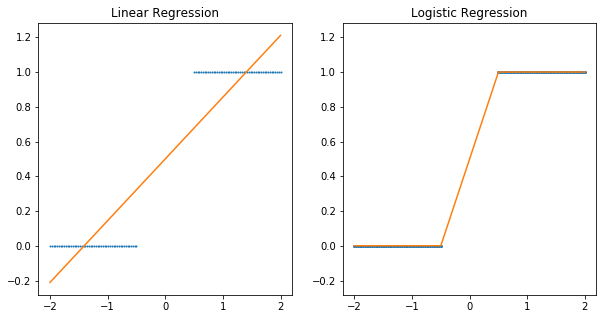

In [8]:
# Plot and compare
ax12 = fig1.add_subplot(1, 2, 2)
ax12.plot(sample_x, sample_y, 'o', markersize=2)

ax12.plot(sample_x, logistic(sample_1x @ hat_beta_new))
ax12.set_ylim(ax11.get_ylim())
ax12.set_title('Logistic Regression')
fig1

Logistic regression은 decision boundary의 linearity를 지키면서도 훨씬 이치에 맞는 fit을 제공해주는 것을 볼 수 있다.

### Monotone transform을 그렇게 막 끼얹나

Monotone transform은 기존 input의 순서를 뒤섞지 않는다.

그러므로 위의 indicator 변수를 이용한 linear regression 상황에서 우리는 최대값을 가장 좋은 것으로 삼기 때문에, logit tranform으로 인해 최대값이 최대값이 아니게 되는 상황은 발생하지 않으므로 정당화될 수 있다.

### Monotone transform이 개선해주는 것들

1. Logistic regression은 기존 linear regression이 해주듯이 decision boundary의 linearity를 유지시켜준다.
2. 그 뿐 아니라 testing하는 경우나 실제 상황에서 적용할 때에는 오히려 더 좋은 (실제 상황에 더 알맞는) decision boundary를 만들어준다.

저 위에 0-1 response를 가지고 linear regression을 돌린 결과를 보자. 이제 test data를 돌려봐야 한다. 첫 번째 test data로 -5124가 나왔다. Model의 예측값을 어떻게 해석해야 할까, 믿을 수 있는 결과일까? 아래는 나 말고 전문가가 얘기해주는 내용이다.

> This is a consequence of the rigid nature of linear regression, especially if we make predictions outside the hull of the training data. These violation (of probabilistic properties) in themselves does not guarantee that this approach will not work. (page 104 of ESL, $\S$ 4.2)
>
> The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, while at the same time ensuring that they sum to one and remain in $[0,1]$.
> (page 119 of ESL, $\S$ 4.4)



### 그래서 결론은

위에서 logistic regression model을 fit하기 위한 코드를 볼 수 있는데, "Linear"와는 거리가 먼 계산이다. logistic regression 문제를 풀기 위해서 주로 multinomial 분포를 가정한 MLE 문제로 세팅하고 풀기 때문에, analytic solution조차 존재하지 않아 iterative하게 풀게 된다.

따라서 logistic regression이 linear method라고 불리는 이유는 linear한 계산을 통해 풀 수 있는 문제여서가 아니라, logistic regression이 제공해주는 decision boundary가 여전히 linear하기 때문인 것이다.

나 혼자 궁금해서 써보고 누가 읽어볼 지 모르는 정리 끝.